### PCA 개요 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

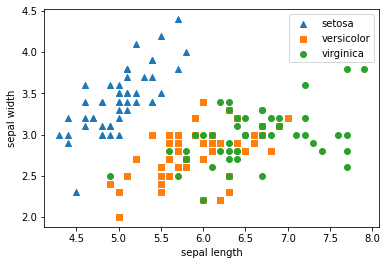

In [10]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**  
PCA 변환하기 전에 개별 피처들을 스케일링해야 함(PCA는 여러 피처들의 값을 연산해야 하므로 피처들의 스케일에 영향을 받음)    
(일반적으로 평균이 0, 분산이 1인 정규분포로 변환함)

In [11]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [12]:
iris_scaled.shape

(150, 4)

**PCA 변환 수행**

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
# PCA로 PCA로 변환된 ndarray형태인 iris_pca를 DataFrame 형태로 바꾸기
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0


**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

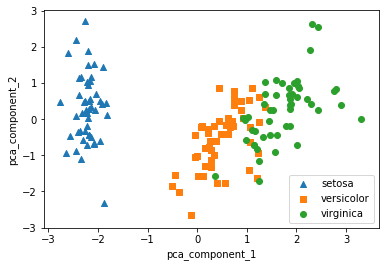

In [7]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

**각 PCA Component별 변동성 비율**

In [25]:
print(pca.explained_variance_ratio_) # 'pca_component_1'이 73% 변동성을 설명하고, 'pca_component_2'가 23%의 변동성을 설명함

[0.72962445 0.22850762]


**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [30]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88


**추가설명)**
iris데이터는 피처 개수가 4개뿐이라서 PCA변환이 예측성능향상에 별로 큰 기여를 하지 않음(오히려 더 안좋게 나옴)  
PCA는 피처 개수가 정말 많고, 서로 상관성이 높을 때 PCA를 통해 데이터를 보다 명확하게 표현할 수 있는 방향성을 제공함 

### 신용카드 데이터 세트 PCA 변환

**데이터 로드 및 컬럼명 변환**

In [11]:
import pandas as pd

df = pd.read_excel('./data/pca_credit_card.xls', sheet_name='Data', header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [13]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
# ID, default 컬럼 Drop
X_features = df.drop(['ID','default'], axis=1)

In [33]:
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [34]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

**피처간 상관도 시각화**

<AxesSubplot:>

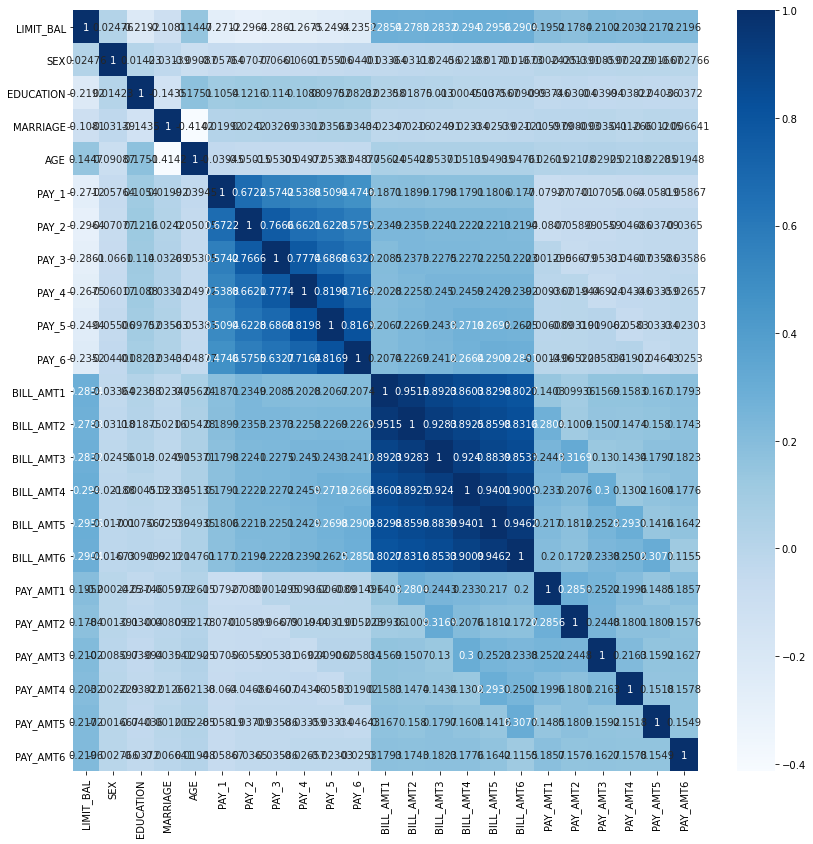

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.4g', cmap='Blues')

<AxesSubplot:>

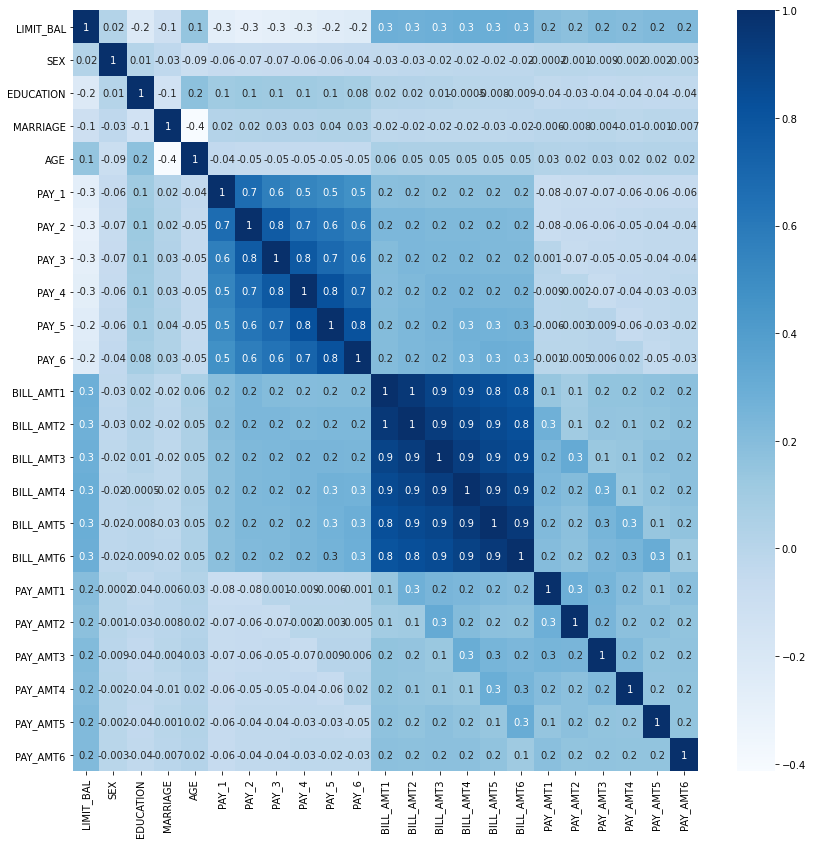

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='Blues')
#PCA는 피처들간의 상관성이 높을 경우 효율이 좋음

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_) #ndarray 형태로 나타내줌

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


**-추가설명)**  
여기서 변동성은 variance, 분산입니다.  PCA는 분산이 데이터 세트의 특성을 잘 나타내는 것으로 간주하여 가장 높은 분산을 가지는 데이터의 축으로 차원을 축소합니다. 위의 예에서 첫번째 PCA Component는 원본 데이터 분산의 약 90.5%, 두번째 PCA Component는 약 5%를 나타내고 있습니다.(즉, 전체변동성에서 첫번째 component는 약 90.5%의 변동성을, 두번째 component는 약 5%의 변동성을 설명함)

**원본 데이터 세트와 6개 컴포넌트로 PCA 변환된 데이터 세트로 분류 예측 성능 비교**

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7919 0.7956 0.8025]
PCA 변환 데이터 셋 평균 정확도:0.7967


PCA변환을 통해 23개의 피처들을 6개로 줄였는데도 예측성능이 비슷하게 나왔다는 것은 PCA가 뛰어난 압축효율이 있는 차원축소 기법임을 알 수 있음. 특히 상관도가 높은 피처들이 많을 경우 훨씬 더 좋은 효율을 보임(원본데이터의 정보를 그대로 유지하면서 훨씬 적은차원으로 압축을 함)

**-PCA 추가 질문답변)**  
-질문)PCA 변환하여 새로운 성분 추출시, 기존 변수가 결합해서 새로운 성분이 추출된건데 원인 변수를 알 수 없는지요? 예를 들어, PCA후 성분1이 생성되었다면, 키의 몇%,  몸무게의 몇%가  합쳐져서 성분1이 생성되었다는 정보 같은..  

-답변)아쉽게도(제가 아는한) 정확히 알 수 있는 방법은 없습니다. 가령 키 60% 몸무게 40%와 같은 형태로 알 수 없습니다.
PCA는 개별 Feature들의 공분산에 기반하여 고유 벡터를 추출하고, 이 고유 벡터를 기반으로 하여 원본 데이터를 선형 변환하는 방식입니다. 이렇게 선형 변환된 데이터를 정확하지는 않지만 손실을 감안하여 원본 데이터와 유사하게 원복은 할 수 있습니다만, 이렇게 하더라도 각 Feature들이 얼만큼 결합되어 PCA변환되었는지 정확히 알 수 있는 방법은 없습니다.
개괄적으로나마 알기 위해서는 약간의 노가다(?) 방법을 동원할 수도 있습니다.  
만일 10개의 FEATURE들이 있고 이를 2개의 PCA component로 변환한다면 10개중 4~5개 정도를 임의로 선택하여 2개의 PCA 로 변환할 때 얼마나 원본과 explained variance ratio가 차이나는지 feature들을 반복해서 테스트 하면서 가장 좋은 feature들을 가려내면서 감을 잡는 방법입니다.  

-질문2) 가장 고유값이 높은 고유벡터의 벡터원소들을 구하면 되는 것 아닌가요?  

-답변2)고유값이 높은 고유 벡터는 PCA로 선형 변환할때 적용됩니다만, 이를 이용해도 원본 데이터를 100% 복원할 수는 없습니다.  사이킷런의 PCA의 inverse_transform()을 적용하면 원본 데이터를 어느정도 복원해주지만, 어떤 속성끼리 결합되어 PCA가 만들어졌는지 100%  알수 없습니다.


**+추가 PCA 설명(최근설명)**  
PCA를 사용하는 목적은 차원 축소를 통해 기존의 데이터 세트의 새로운 면을 발견하는것이 주요 목적입니다.   
원본 데이터가 아닌 PCA변환된 데이터 세트를 기반으로 Classification/Regression의 수행성능을 높일 수 있는 경우는 그리 흔하지 않습니다. 그 흔하지 않은 경우중에 만일 상관 관계가 높은 피처들이 많은 데이터 세트가 있을 경우에는 PCA로 변환을 한 데이터 세트에 변환을 해서 예측 성능이 좋아 질 수도 있지만, 근래 머신러닝 알고리즘들은 성능 자체가 좋아져서 그런 경우가 나오기도 어렵습니다. 과거에 차원 축소를 해서 Classification/Regression에 적용한 경우에는 예측 성능을 향상 시키려는 목적 보다는 학습/예측 수행 시간을 줄이려는 목적이 더 강합니다. 요즘은 H/W(특히 메모리 크기)가 좋아져서 크게 속도 차이도 나지 않습니다.  
Classification/Regression에 PCA를 활용하는 경우는 주로 원본 데이터 세트에 PCA 변환된 데이터 세트를 피처로 추가한 데이터 세트에 학습/예측을 수행하는 것입니다. 즉 원본 데이터가 A,B,C  피처, PCA 변환된 데이터를 A-1, B-1 로 하면, A,B,C,A-1,B-1 데이터 세트를 학습/예측에 사용하는 것입니다. 이런 방식을 Semi-supervised 방식이라고 합니다. 하지만 이 방법은 실시간 예측을 할 수 없습니다. 학습 데이터는 미리 이런 방식으로 만들 수 있지만, 예측 데이터는 실시간으로 pca 변환한 데이터를 만들기 어렵기 때문에 이 방식은 배치 기반의 예측 데이터를 기반으로 할때 적용해 볼 수 있는 방식입니다.  

질문에 대한 답변을 요약드리면 아래와 같습니다.  
1. PCA를 비롯한 차원 축소 알고리즘을 차원 축소를 통해 기존의 데이터 세트에서 새로운 면을 발견하는 것이며, 또한 기존 데이터 세트에서 중요한 FEATURE 들의 영향력이 얼마나 되는지를 파악하는 것입니다.  
2. 차원 축소를 하면 일반적으로 예측 성능이 떨어집니다.  Classification/Regression (약간의) 수행 성능을 향상시키는 기법으로 원본 데이터 세트에 PCA 차원 축소된 데이터 세트를 추가하여 학습/예측하는 Semi-supervised 기법이 있습니다.  
3. 'PCA가 피처가 많을 때 사용한다'는 의미는 상관관계가 높은 피처가 많을 때 사용한다는 의미가 일반적입니다. 그런데. 피처의 갯수가 수백개를 넘어서는 경우 메모리 사이즈의 이슈가 있다면 pca 적용을 고려해 볼수 있습니다.  
4. Classification뿐만 아니라 Regression에서도 PCA는 동일하게 적용됩니다.  